# **Wine Quality Prediction and Analysis Tool**

An analytical tool for Vinho Verde winemakers and growers to predict the quality of wine based on its chemical makeup.

**Notebook Setup and Importation of Additional Python Libraries:**

This project was built using Jupyter Notebooks and deployed to the web using Voila and Heroku.

The application utilizes the Python libraries **pandas**, **scikit-learn**, **matplotlib**, **seaborn**, and **ipywidgets** for data manipulation, analysis, and visualization.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from ipywidgets import Button, Layout, Output
from IPython.display import display

%matplotlib inline

**Reading and storing the data in a dataframe:**

The data must then be read from the .csv file holding the dataset for later use in the 
notebook using **pandas**.

**Initial Inspection of the Dataset:**

We can inspect the initial state of the dataset by printing the first 20 rows:

In [20]:
url = './winequality-red.csv'

data = pd.read_csv(url)

df = pd.DataFrame(data)

df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Categorical Separation of Quality Values:**

In order for the classification model to perform correctly, the 'Quality' values are separated
into three distinct categories based on their original integer values. Integers in the ranges **below 5**, **5 or 6**, and **greater than 6** are sorted into *Poor*, *Average*, and *Excellent* respectively. We can again inspect the first 20 rows to ensure the conversion excecuted successfully and data is ready to be entered into the machine learning model.

In [21]:
df.astype({'quality' : 'string'}).dtypes

for i in df.index:
    if df.at[i, 'quality'] < 5:
        df.at[i, 'quality'] = 'Poor'
    elif df.at[i, 'quality'] == 5  or df.at[i, 'quality'] == 6:
        df.at[i, 'quality'] = 'Average'
    else:
        df.at[i, 'quality'] = 'Excellent'

df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Excellent
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Excellent
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Average


**Machine Learning Model Setup, Training, and Accuracy:**

A Random Forest classification algorithm was chosen to fulfill the machine learning needs of 
the application. The model strives for an accuracy rate of at least 84% every time. In this cell, we create the model, separate the data into training and testing sets, and train the model.

The information output below shows the accuracy metrics of the Random Forest algorithm.

In [22]:
# RANDOM FOREST ALGORITHM
my_RF_model = RandomForestClassifier()

# SELECT VALUES FOR CLASSIFICATION MODEL
y = df.values[:,11]
x = df.values[:,0:11]

# TRAIN THE RANDOM FOREST MODEL
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.30)

my_RF_model.fit(x_train, y_train)

# MAKE PREDICTION WITH TEST DATA
y_RF_pred = my_RF_model.predict(x_test)

# GET ACCURACY SCORES FOR RANDOM FOREST MODEL
print('Model Accuracy Percentage:', metrics.accuracy_score(y_test, y_RF_pred))

Model Accuracy Percentage: 0.8645833333333334


# Data Visualizations

**Quality Distribution Across Dataset**

This pie chart shows the distribution of the three quality categories across the dataset.

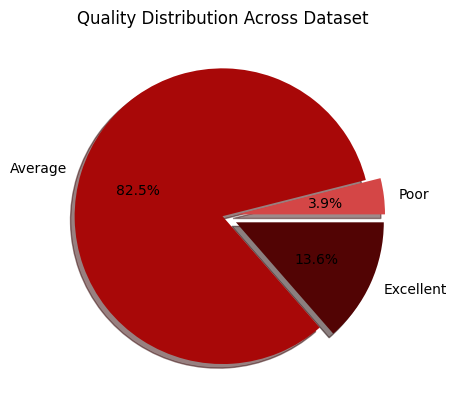

In [23]:
# MATPLOTLIB PIE CHART
labels = 'Poor', 'Average', 'Excellent'

poor_ct = df['quality'].value_counts()['Poor']
avg_ct = df['quality'].value_counts()['Average']
excl_ct = df['quality'].value_counts()['Excellent']

colors = ['#d44646','#a80808', '#520404']
explode =(0.1, 0, 0.1)
sizes = [poor_ct, avg_ct, excl_ct]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode,
       shadow=True)
plt.title('Quality Distribution Across Dataset')
plt.show()

**Chemical Makeup Correlation Matrix**

This symmetrical graph visualization shows the Correlation Matrix of the chemical aspects of the wine their relationship with one another. Each cell of the matrix shows the Correlation Coefficient, which is the statistical measure of strength of a linear relationship between two variables. Negative values signify an inverse relationship between variables, while a positive value signifies a direct relationship.

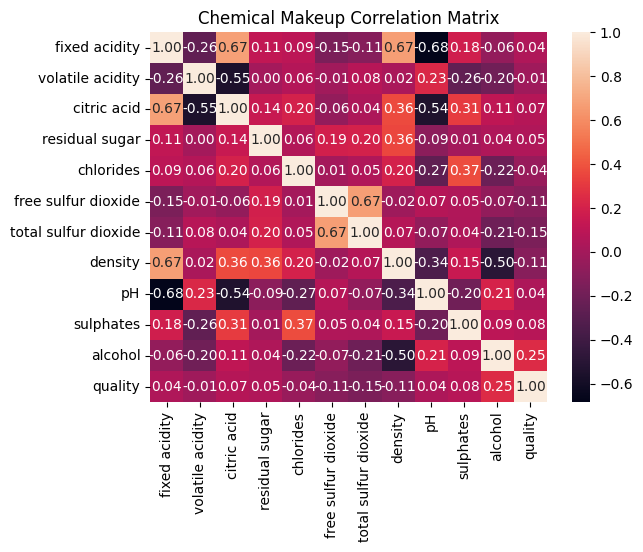

In [24]:
df['quality'] = df['quality'].astype('category').cat.codes
corr_matrix = df.corr()
ax = plt.axes()
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt='.2f')
ax.set_title('Chemical Makeup Correlation Matrix')
plt.show()

**3-D Scatterplot Showing Relationship Between Residual Sugar, Fixed Acidity, and Quality**

The 3-D Scatterplot below shows the relationship between two of the most important contributors to the flavor of wine (residual sugar and fixed acidity) and quality.

To use quality as a metric in the 3-D plot, the values 'Average', 'Excellent', and 'Poor' are cast to the categorical integer codes 0, 1, and 2 respectively.

Inspecting the plot, one can see the three distinct 'layers' of quality that the data points map to.

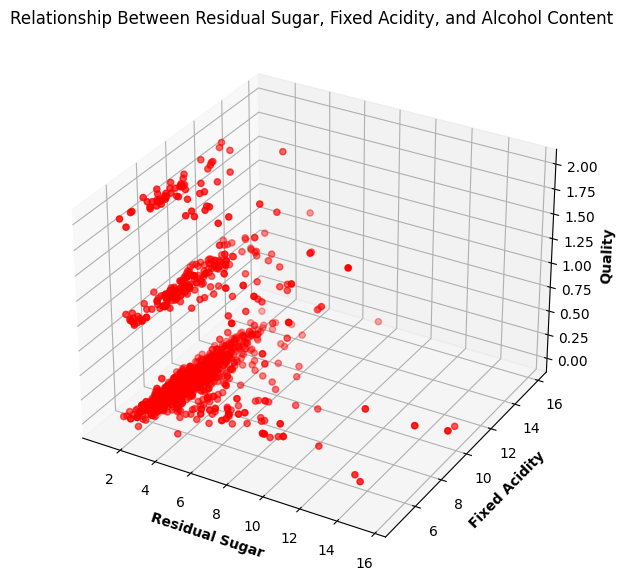

In [25]:
x = df['residual sugar']
y = df["fixed acidity"]
z = df['quality'].astype('category').cat.codes

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

ax.set_xlabel('Residual Sugar', fontweight='bold')
ax.set_ylabel('Fixed Acidity', fontweight='bold')
ax.set_zlabel('Quality', fontweight='bold')

ax.scatter3D(x, y, z, color='red')
plt.title("Relationship Between Residual Sugar, Fixed Acidity, and Alcohol Content")

plt.show()

# Quality Prediction Tool & User Interface

This section can be used to input values corresponding to the chemical makeup of the wine to be tested. Sliders are set to operate within the minimum and maximum range of each distinct value category found in the dataset.

Simply adjust the sliders to your chosen value and then proceed to the **Predict Quality** button to make a prediction!

**Chemical Makeup Sliders:**

In [39]:
fa_slider = widgets.FloatSlider(
    value = 10.25,
    min = 4.6,
    max = 15.9,
    step = 0.1,
    description = 'Fixed Acidity',
    readout_format='.1f',
    layout = Layout(width='500px')
)
fa_slider

va_slider = widgets.FloatSlider(
    value = 0.85,
    min = 0.12,
    max = 1.58,
    step = 0.001,
    description = 'Volatile Acidity',
    readout_format='.3f',
    layout = Layout(width='500px')
)
va_slider

ca_slider = widgets.FloatSlider(
    value = 0.50,
    min = 0.0,
    max = 1.0,
    step = 0.01,
    description = 'Citric Acid',
    readout_format='.2f',
    layout = Layout(width='500px')
)
ca_slider

rs_slider = widgets.FloatSlider(
    value = 8.2,
    min = 0.9,
    max = 15.5,
    step = 0.01,
    description = 'Residual Sugar',
    readout_format='.2f',
    layout = Layout(width='500px')
)
rs_slider

chl_slider = widgets.FloatSlider(
    value = 0.3115,
    min = 0.012,
    max = 0.611,
    step = 0.001,
    description = 'Chlorides',
    readout_format='.3f',
    layout = Layout(width='500px')
)
chl_slider

fsd_slider = widgets.FloatSlider(
    value = 36.50,
    min = 1.0,
    max = 72.0,
    step = 0.1,
    description = 'Free Sulfur Dioxide',
    readout_format='.1f',
    layout = Layout(width='500px')
)
fsd_slider

tsd_slider = widgets.FloatSlider(
    value = 147.5,
    min = 6.0,
    max = 289.0,
    step = 0.01,
    description = 'Total Sulfur Dioxide',
    readout_format='.1f',
    layout = Layout(width='500px')
)
tsd_slider

dns_slider = widgets.FloatSlider(
    value = 0.9967,
    min = 0.99007,
    max = 1.00369,
    step = 0.00001,
    description = 'Density',
    readout_format='.5f',
    layout = Layout(width='500px')
)
dns_slider

ph_slider = widgets.FloatSlider(
    value = 3.375,
    min = 2.74,
    max = 4.01,
    step = 0.01,
    description = 'pH',
    readout_format='.2f',
    layout = Layout(width='500px')
)
ph_slider

su_slider = widgets.FloatSlider(
    value = 1.165,
    min = 0.33,
    max = 2.0,
    step = 0.01,
    description = 'Sulphates',
    readout_format='.2f',
    layout = Layout(width='500px')
)
su_slider

alc_slider = widgets.FloatSlider(
    value = 11.65,
    min = 8.4,
    max = 14.9,
    step = 0.1,
    description = 'Alcohol',
    readout_format='.1f',
    layout = Layout(width='500px')
)
alc_slider

display(fa_slider)
display(va_slider)
display(ca_slider)
display(rs_slider)
display(chl_slider)
display(fsd_slider)
display(tsd_slider)
display(dns_slider)
display(ph_slider)
display(su_slider)
display(alc_slider)

FloatSlider(value=10.25, description='Fixed Acidity', layout=Layout(width='500px'), max=15.9, min=4.6, readout…

FloatSlider(value=0.85, description='Volatile Acidity', layout=Layout(width='500px'), max=1.58, min=0.12, read…

FloatSlider(value=0.5, description='Citric Acid', layout=Layout(width='500px'), max=1.0, step=0.01)

FloatSlider(value=8.2, description='Residual Sugar', layout=Layout(width='500px'), max=15.5, min=0.9, step=0.0…

FloatSlider(value=0.3115, description='Chlorides', layout=Layout(width='500px'), max=0.611, min=0.012, readout…

FloatSlider(value=36.5, description='Free Sulfur Dioxide', layout=Layout(width='500px'), max=72.0, min=1.0, re…

FloatSlider(value=147.5, description='Total Sulfur Dioxide', layout=Layout(width='500px'), max=289.0, min=6.0,…

FloatSlider(value=0.9967, description='Density', layout=Layout(width='500px'), max=1.00369, min=0.99007, reado…

FloatSlider(value=3.375, description='pH', layout=Layout(width='500px'), max=4.01, min=2.74, step=0.01)

FloatSlider(value=1.165, description='Sulphates', layout=Layout(width='500px'), max=2.0, min=0.33, step=0.01)

FloatSlider(value=11.65, description='Alcohol', layout=Layout(width='500px'), max=14.9, min=8.4, readout_forma…

**Prediction Output:**

After setting the above sliders to your desired values, click the
**"Predict Quality"** button below to output the model's prediction using the Random Forest algorithm, either 'Poor', 'Average', or 'Excellent!'

In [40]:
def get_values():
        fa = fa_slider.value
        va = va_slider.value
        ca = ca_slider.value
        rs = rs_slider.value
        chl = chl_slider.value
        fsd = fsd_slider.value
        tsd = tsd_slider.value
        dns = dns_slider.value
        pH = ph_slider.value
        su = su_slider.value
        alc = alc_slider.value

        x = [fa, va, ca, rs, chl, fsd, tsd, dns, pH, su, alc]

        return x

def clicked(arg):
        with output_box:
                print(' Wine Quality:', my_RF_model.predict([get_values()])[0])

button = Button(description='Predict Quality', layout=Layout(width='25%', height='40px'))
output_box = Output(layout={'border': '1px solid black'})
display(button, output_box)
button.on_click(clicked)

Button(description='Predict Quality', layout=Layout(height='40px', width='25%'), style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…